In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = '/content/drive/MyDrive/008 - My Projects/Loan Approval/Loan Sanction CSV.csv'
df = pd.read_csv(data)

In [ ]:
'''Beginning by exploring the dataset'''
'''Understanding the structure of data, the Dtypes of variables available, and the general patterns'''

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
'''Point to be noted that feature '#Dependents' is in Object type even though its values are '#Numeric', So need to convert that to int/float'''

'''Also i noticed certain '+' signs are visible along with some Numeric values in '#Dependents' feature, so removing them FIRST'''

df['Dependents'] = df['Dependents'].str.replace('+','')

In [ ]:
df['Dependents'].head(5)

,Dependents
0,0
1,1
2,2
3,2
4,0


In [ ]:
'''Now converting from Object type to Numeric type(int/float)'''

df['Dependents'] = pd.to_numeric(df['Dependents'])

In [ ]:
df['Dependents'].head(5)

,Dependents
0,0.0
1,1.0
2,2.0
3,2.0
4,0.0


In [ ]:
'''Checking for Dtype conversion and Null values'''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    float64
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 34.5+ KB


In [ ]:
'''Descriptive Statistics about our Dataset'''

df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,357.000000,367.000000,367.000000,362.000000,361.000000,338.000000
mean,0.829132,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,1.071302,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,0.000000,28.000000,6.000000,0.000000
25%,0.000000,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,2.000000,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,3.000000,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [ ]:
#As soon as we perform Exploratory and Descriptive analysis, we can now begin Data Cleaning & Pre-processing.

In [ ]:
'''Let's drop any duplicate entries and check the shape of our dataset'''

df.drop_duplicates()
df.shape

(367, 12)

In [ ]:
'''Let's find Null/Missing values in our dataset(Column-wise)'''

df.isnull().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [ ]:
'''Total Number of Null values in our dataset'''

df.isnull().sum().sum()

84

In [ ]:
'''We need to fill these missing values with the appropriate values, which enables us analyse better insights from our dataset'''

'''The reason to fill Null/Missing values is that we can't analyse the data without it'''

In [ ]:
#For Categorical features, filling them with Mode.

#In 'Gender', Mode is 'Male'
#In 'Self_Employed', Mode is 'No'.

'''Feature - Gender'''
'''Feature - Self_Employed'''

df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [ ]:
#For Numerical features like

'''Dependents'''
'''LoanAmount'''
'''Loan_Amount_Term'''
'''Credit_History'''

#First calculate the percentage of Null values specifically column-wise.

df.isnull().sum()/df.shape[0]*100

,0
Loan_ID,0.000000
Gender,0.000000
Married,0.000000
Dependents,2.724796
Education,0.000000
Self_Employed,0.000000
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,1.362398
Loan_Amount_Term,1.634877


<Axes: ylabel='Dependents'>

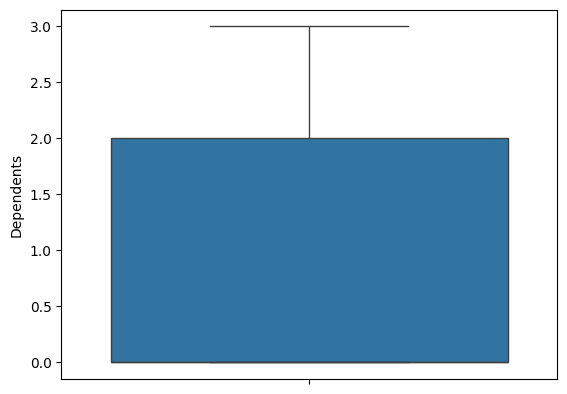

In [ ]:
'''Feature - Dependents'''

# Drawing a boxplot of feature 'Dependents' for checking if there's any outliers exist

sns.boxplot(df['Dependents'])

<Axes: xlabel='Dependents', ylabel='Density'>

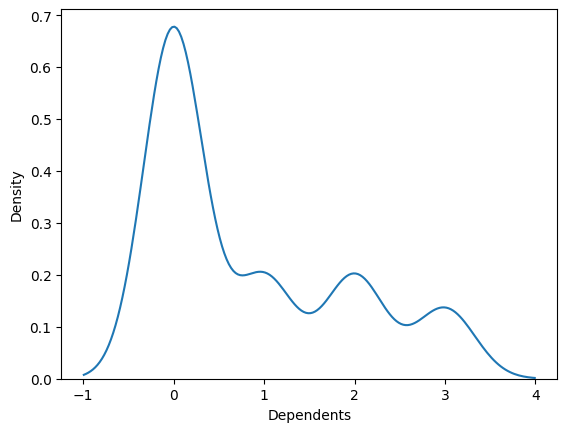

In [ ]:
# Checking the distribution of feature 'Dependents'

sns.kdeplot(df['Dependents'])

In [ ]:
# The feature 'Dependents' doesn't exist any outliers but as we can see, it is positively skewed.

median_value = df['Dependents'].median()
median_value

0.0

In [ ]:
# So filling the Null values in this feature by Median.

df['Dependents'] = df['Dependents'].fillna(median_value).astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    float64
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 34.5+ KB


<Axes: ylabel='LoanAmount'>

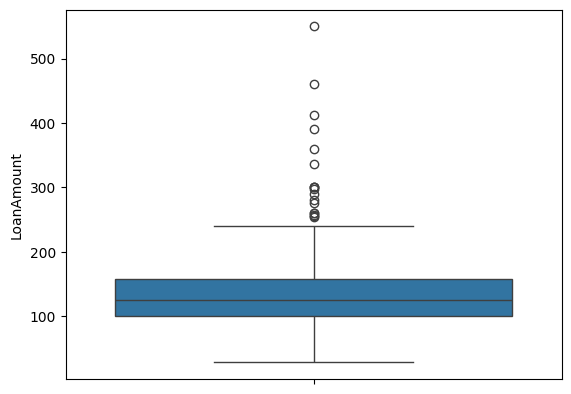

In [ ]:
'''Feature - LoanAmount'''

# Drawing a boxplot of feature 'LoanAmount' for checking if there's any outliers exist

sns.boxplot(df['LoanAmount'])


In [ ]:
# Checking Median.

median_loan_amount = df['LoanAmount'].median()
median_loan_amount

125.0

In [ ]:
# Filling Null values with Median first.

df['LoanAmount'] = df['LoanAmount'].fillna(median_loan_amount).astype(float)

In [ ]:
'''Outliers handling in feature 'LoanAmount' by IQR Method.'''

In [ ]:
# Calculating IQR for Feature 'LoanAmount'.

Q1 = df['LoanAmount'].quantile(0.25)
print(f"Q1 is {Q1}")

Q3 = df['LoanAmount'].quantile(0.75)
print(f"Q3 is {Q3}")

Q1 is 101.0
Q3 is 157.5


In [ ]:
IQR = Q3 - Q1
print(f"IQR is {IQR}")

IQR is 56.5


In [ ]:
# Defining the outlier boundaries.

lower_bound = Q1 - 1.5 * IQR
print(lower_bound)

upper_bound = Q3 + 1.5 * IQR
print(upper_bound)

16.25
242.25


In [ ]:
# Identifying outliers.

# Our dataset lies between 16.25 and 242.25 as per IQR Method, therefore any value below 16.25 and beyond 242.25 is considered as an outlier in feature 'LoanAmount'.

outliers = df[(df['LoanAmount'] < lower_bound) | (df['LoanAmount'] > upper_bound)]
outliers

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
8,LP001059,Male,Yes,2.0,Graduate,No,13633,0,280.0,240.0,1.0,Urban
18,LP001108,Male,Yes,0.0,Graduate,No,9226,7916,300.0,360.0,1.0,Urban
24,LP001149,Male,Yes,0.0,Graduate,No,5400,4380,290.0,360.0,1.0,Urban
27,LP001169,Male,Yes,0.0,Graduate,No,7500,3750,275.0,360.0,1.0,Urban
81,LP001428,Male,Yes,3.0,Graduate,No,72529,0,360.0,360.0,1.0,Urban
83,LP001446,Male,Yes,0.0,Graduate,No,8449,0,257.0,360.0,1.0,Rural
91,LP001483,Male,Yes,3.0,Graduate,No,13518,0,390.0,360.0,1.0,Rural
96,LP001500,Male,Yes,1.0,Graduate,No,3333,4200,256.0,360.0,1.0,Urban
124,LP001655,Female,No,0.0,Graduate,No,12500,0,300.0,360.0,0.0,Urban
143,LP001791,Male,Yes,0.0,Graduate,Yes,32000,0,550.0,360.0,NaN,Semiurban


In [ ]:
# Replacing Outliers with Median.

df['LoanAmount'] = np.where((df['LoanAmount'] < lower_bound) | (df['LoanAmount'] > upper_bound), median_loan_amount, df['LoanAmount'])
print(df['LoanAmount'])

0      110.0
1      126.0
2      208.0
3      100.0
4       78.0
       ...  
362    113.0
363    115.0
364    126.0
365    158.0
366     98.0
Name: LoanAmount, Length: 367, dtype: float64


<Axes: ylabel='LoanAmount'>

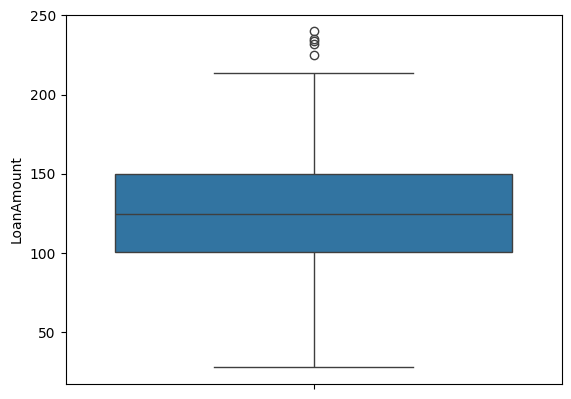

In [ ]:
# We see that there are still a few outliers exists.

sns.boxplot(df['LoanAmount'])

In [ ]:
# Calculating IQR for 'LoanAmount' again after the previous transformations.

Q1 = df['LoanAmount'].quantile(0.25)
print(f"Q1 is {Q1}")

Q3 = df['LoanAmount'].quantile(0.75)
print(f"Q3 is {Q3}")

Q1 is 101.0
Q3 is 150.0


In [ ]:
IQR = Q3 - Q1
print(f"IQR is {IQR}")

IQR is 49.0


In [ ]:
# Defining new outlier boundaries.

lower_bound = Q1 - 1.5 * IQR
print(lower_bound)

upper_bound = Q3 + 1.5 * IQR
print(upper_bound)

27.5
223.5


In [ ]:
# Now, instead of replacing with Median, Capping the outliers to boundary values.

df['LoanAmount'] = np.where(df['LoanAmount'] < lower_bound, lower_bound, df['LoanAmount'])
df['LoanAmount'] = np.where(df['LoanAmount'] > upper_bound, upper_bound, df['LoanAmount'])

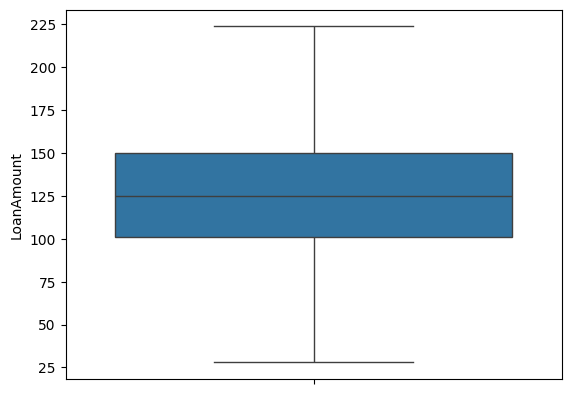

In [ ]:
# Checking our Distribution again.

sns.boxplot(df['LoanAmount'])
plt.show()

<Axes: ylabel='Loan_Amount_Term'>

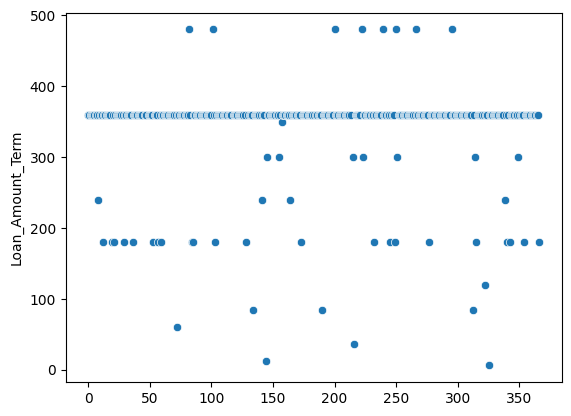

In [ ]:
'''Feature - Loan_Amount_Term'''

# Drawing a scatterplot of feature 'Loan_Amount_Term' for checking if there's any outliers exist

sns.scatterplot(df['Loan_Amount_Term'])

In [ ]:
'''Outliers handling in feature 'Loan_Amount_Term' by IQR Method.'''

In [ ]:
# Calculating IQR for 'Loan_Amount_Term'.

Q1 = df['Loan_Amount_Term'].quantile(0.25)
print(f"Q1 is {Q1}")

Q3 = df['Loan_Amount_Term'].quantile(0.75)
print(f"Q3 is {Q3}")

Q1 is 360.0
Q3 is 360.0


In [ ]:
IQR = Q3 - Q1
print(f"IQR is {IQR}")

IQR is 0.0


In [ ]:
# Defining the outlier boundaries.

lower_bound = Q1 - 1.5 * IQR
print(lower_bound)

upper_bound = Q3 + 1.5 * IQR
print(upper_bound)

360.0
360.0


In [ ]:
# Identifying outliers.

# Our dataset lies at 360 as per IQR Method, therefore any value below and beyond 360.0 is considered as an outlier in feature 'Loan_Amount_Term'.

outliers = df[(df['Loan_Amount_Term'] < lower_bound) | (df['Loan_Amount_Term'] > upper_bound)]
outliers

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
8,LP001059,Male,Yes,2.0,Graduate,No,13633,0,125.0,240.0,1.0,Urban
12,LP001083,Male,No,3.0,Graduate,No,4166,0,40.0,180.0,NaN,Urban
19,LP001115,Male,No,0.0,Graduate,No,1300,3470,100.0,180.0,1.0,Semiurban
21,LP001124,Female,No,3.0,Not Graduate,No,2083,0,28.0,180.0,1.0,Urban
29,LP001176,Male,No,0.0,Graduate,No,2942,2382,125.0,180.0,1.0,Urban
36,LP001208,Male,Yes,2.0,Graduate,No,7350,4029,185.0,180.0,1.0,Urban
53,LP001298,Male,Yes,2.0,Graduate,No,4116,1000,30.0,180.0,1.0,Urban
57,LP001321,Male,Yes,2.0,Graduate,No,3613,3539,134.0,180.0,1.0,Semiurban
59,LP001324,Male,Yes,3.0,Graduate,No,4720,0,90.0,180.0,1.0,Semiurban
72,LP001375,Male,Yes,1.0,Graduate,No,4083,1775,139.0,60.0,1.0,Urban


In [ ]:
# Checking Median.

median_loan_term = df['Loan_Amount_Term'].median()
median_loan_term

360.0

In [ ]:
# Replacing outliers with Median.

df['Loan_Amount_Term'] = np.where((df['Loan_Amount_Term'] < lower_bound) | (df['Loan_Amount_Term'] > upper_bound), median_loan_term, df['Loan_Amount_Term'])
print(df['Loan_Amount_Term'])

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
362    360.0
363    360.0
364    360.0
365    360.0
366    360.0
Name: Loan_Amount_Term, Length: 367, dtype: float64


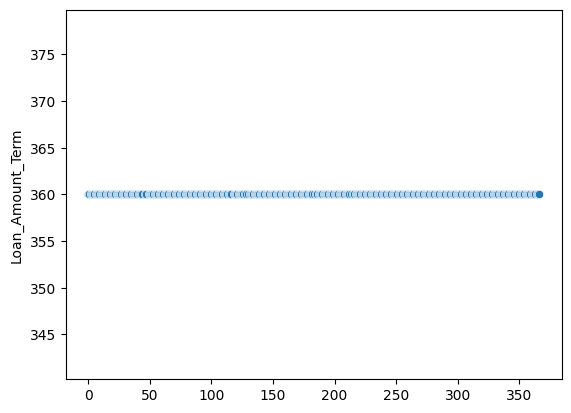

In [ ]:
# Visualizing the distribution after handling outliers.

sns.scatterplot(df['Loan_Amount_Term'])
plt.show()

In [ ]:
# As the Outliers have been handled, we need to fill missing values in feature 'Loan_Amount_Term' by Median.

df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(median_loan_term).astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    float64
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 34.5+ KB


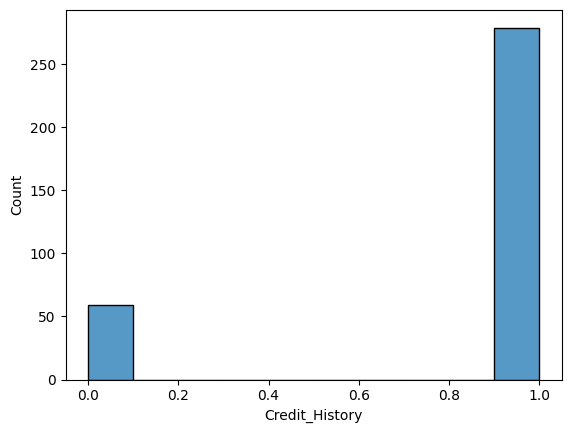

In [ ]:
'''Feature - Credit_History'''

# Drawing a histplot of feature 'Credit_History' for checking if there's any outliers exist

sns.histplot(df['Credit_History'])
plt.show()

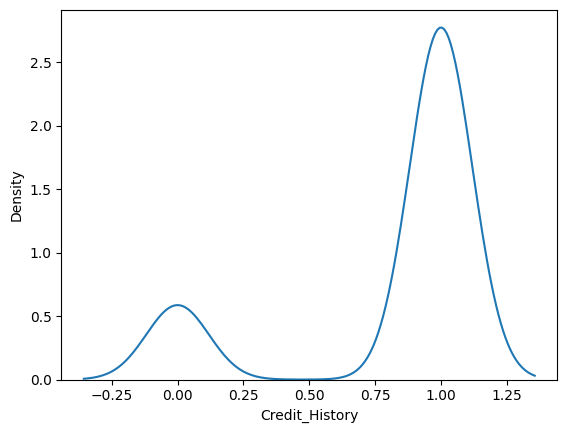

In [ ]:
# Checking the distribution of feature 'Credit_History'

sns.kdeplot(df['Credit_History'])
plt.show()

In [ ]:
df['Credit_History'].value_counts()

,count
Credit_History,
1.0,279
0.0,59


In [ ]:
# The feature "Credit_History" doesn't have any outliers but as we can see, it is negatively skewed.

credit_median = df['Credit_History'].median()
credit_median

1.0

In [ ]:
# So filling the Null values in this feature by Median.

df['Credit_History'] = df['Credit_History'].fillna(credit_median).astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    float64
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    int64  
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 34.5+ KB


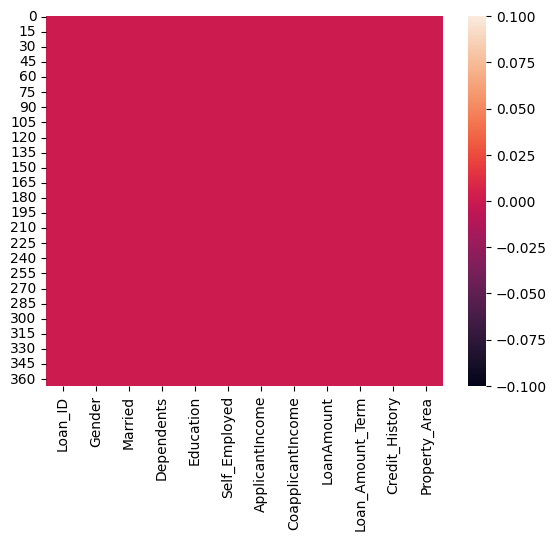

In [ ]:
'''Let's draw a HEATMAP to ensure all Null values has been handled'''
sns.heatmap(df.isnull())
plt.show()

In [ ]:
# NOTE

# As all the Outliers and Null values in above features has been handled, We still have two Numerical features left to check at least for Outliers.
# The features are 'ApplicantIncome' & 'CoapplicantIncome'.

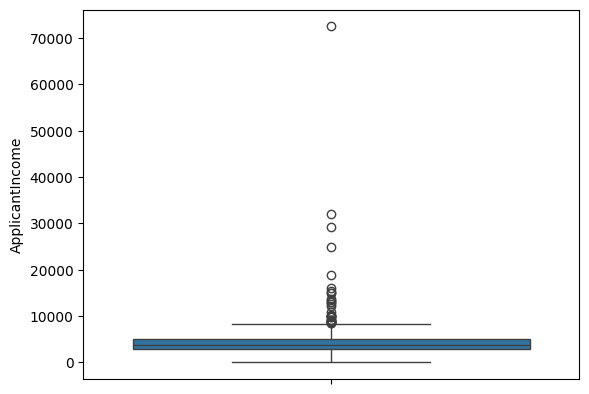

In [ ]:
'''Feature - ApplicantIncome'''

# Drawing a boxplot of feature 'ApplicantIncome' for checking if there's any outliers exist

sns.boxplot(df['ApplicantIncome'])
plt.show()

In [ ]:
'''Outliers handling in feature 'ApplicantIncome' by IQR Method.'''

In [ ]:
# Calculating IQR for 'ApplicantIncome'.

Q1 = df['ApplicantIncome'].quantile(0.25)
print(f"Q1 is {Q1}")

Q3 = df['ApplicantIncome'].quantile(0.75)
print(f"Q3 is {Q3}")

Q1 is 2864.0
Q3 is 5060.0


In [ ]:
IQR = Q3 - Q1
print(f"IQR is {IQR}")

IQR is 2196.0


In [ ]:
# Defining the outlier boundaries.

lower_bound = Q1 - 1.5 * IQR
print(lower_bound)

upper_bound = Q3 + 1.5 * IQR
print(upper_bound)

-430.0
8354.0


In [ ]:
# Identifying outliers.

# Our dataset lies between -430 and 8354 as per IQR Method, therefore any value below -430 and beyond 8354 is considered as an outlier in feature 'LoanAmount'.

outliers = df[(df['ApplicantIncome'] < lower_bound) | (df['ApplicantIncome'] > upper_bound)]
outliers

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
8,LP001059,Male,Yes,2.0,Graduate,No,13633,0,125.0,360.0,1,Urban
13,LP001094,Male,Yes,2.0,Graduate,No,12173,0,166.0,360.0,0,Semiurban
18,LP001108,Male,Yes,0.0,Graduate,No,9226,7916,125.0,360.0,1,Urban
81,LP001428,Male,Yes,3.0,Graduate,No,72529,0,125.0,360.0,1,Urban
83,LP001446,Male,Yes,0.0,Graduate,No,8449,0,125.0,360.0,1,Rural
91,LP001483,Male,Yes,3.0,Graduate,No,13518,0,125.0,360.0,1,Rural
98,LP001517,Male,Yes,3.0,Graduate,No,9719,0,61.0,360.0,1,Urban
124,LP001655,Female,No,0.0,Graduate,No,12500,0,125.0,360.0,0,Urban
143,LP001791,Male,Yes,0.0,Graduate,Yes,32000,0,125.0,360.0,1,Semiurban
144,LP001794,Male,Yes,2.0,Graduate,Yes,10890,0,125.0,360.0,1,Rural


In [ ]:
# Checking Median.

median_applicant_income = df['ApplicantIncome'].median()
median_applicant_income

3786.0

In [ ]:
# Replacing Outliers in 'ApplicantIncome' with Median
# and
# Replacing 'ApplicantIncome' < 1000 with Median too.
# (Reason being two values have 0 income and remaining two values have barely any income, which is practically not a possible income for a primary loan applicant)

df['ApplicantIncome'] = np.where((df['ApplicantIncome'] < lower_bound) | (df['ApplicantIncome'] > upper_bound), median_applicant_income, df['ApplicantIncome'])

df['ApplicantIncome'] = np.where(df['ApplicantIncome'] < 1000 , median_applicant_income, df['ApplicantIncome'])

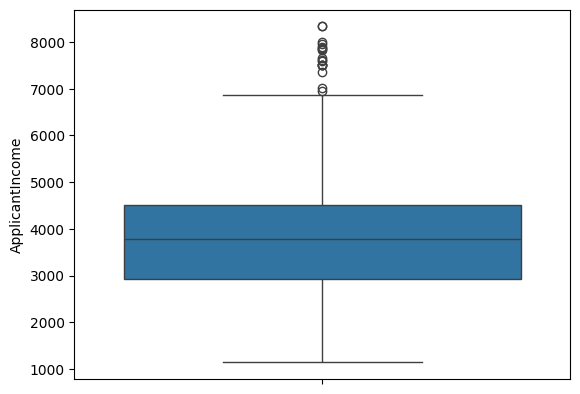

In [ ]:
# We see that there are still a few outliers exists.

sns.boxplot(df['ApplicantIncome'])
plt.show()

In [ ]:
# Calculate the IQR for 'ApplicantIncome' again after the previous transformations.

Q1 = df['ApplicantIncome'].quantile(0.25)
print(f"Q1 is {Q1}")

Q3 = df['ApplicantIncome'].quantile(0.75)
print(f"Q3 is {Q3}")

Q1 is 2915.5
Q3 is 4506.5


In [ ]:
IQR = Q3 - Q1
print(f"IQR is {IQR}")

IQR is 1591.0


In [ ]:
# Defining new outlier boundaries.

lower_bound = Q1 - 1.5 * IQR
print(lower_bound)

upper_bound = Q3 + 1.5 * IQR
print(upper_bound)

529.0
6893.0


In [ ]:
# Now, instead of replacing with Median, Capping the outliers to boundary values.

df['ApplicantIncome'] = np.where(df['ApplicantIncome'] < lower_bound, lower_bound, df['ApplicantIncome'])
df['ApplicantIncome'] = np.where(df['ApplicantIncome'] > upper_bound, upper_bound, df['ApplicantIncome'])

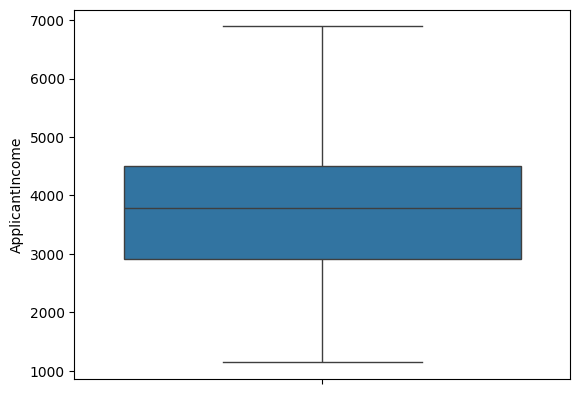

In [ ]:
# Checking our Distribution again.

sns.boxplot(df['ApplicantIncome'])
plt.show()

<Axes: ylabel='CoapplicantIncome'>

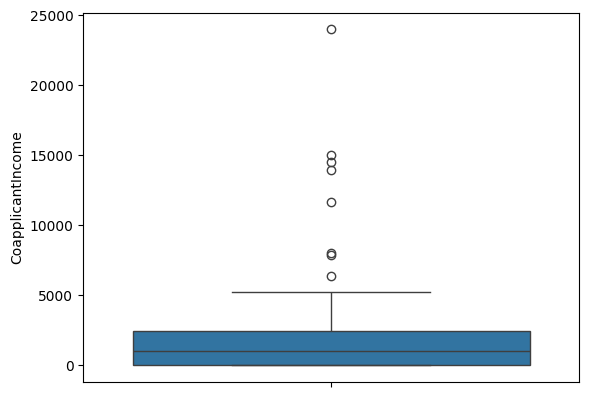

In [ ]:
'''Feature - CoapplicantIncome  '''

# Drawing a boxplot of feature 'CoapplicantIncome' for checking if there's any outliers exist

sns.boxplot(df['CoapplicantIncome'])

In [ ]:
'''Outliers handling in feature 'CoapplicantIncome' by IQR Method.'''

In [ ]:
# Calculating IQR for 'CoapplicantIncome'.

Q1 = df['CoapplicantIncome'].quantile(0.25)
print(f"Q1 is {Q1}")

Q3 = df['CoapplicantIncome'].quantile(0.75)
print(f"Q3 is {Q3}")

Q1 is 0.0
Q3 is 2430.5


In [ ]:
IQR = Q3 - Q1
print(f"IQR is {IQR}")

IQR is 2430.5


In [ ]:
# Defining the outlier boundaries.

lower_bound = Q1 - 1.5 * IQR
print(lower_bound)

upper_bound = Q3 + 1.5 * IQR
print(upper_bound)

-3645.75
6076.25


In [ ]:
# Identifying outliers.

# Our dataset lies between -3645.75 and 6076.25 as per IQR Method, therefore any value below -3645.75 and beyond 6076.25 is considered as an outlier in feature 'CoapplicantIncome'.

outliers = df[(df['CoapplicantIncome'] < lower_bound) | (df['CoapplicantIncome'] > upper_bound)]
outliers

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
18,LP001108,Male,Yes,0.0,Graduate,No,3786.0,7916,125.0,360.0,1,Urban
25,LP001153,Male,No,0.0,Graduate,No,3786.0,24000,148.0,360.0,0,Rural
85,LP001452,Male,Yes,2.0,Graduate,No,4635.0,8000,102.0,360.0,1,Rural
123,LP001652,Male,No,0.0,Graduate,No,2500.0,6414,187.0,360.0,0,Rural
230,LP002294,Male,No,0.0,Graduate,No,3786.0,14507,130.0,360.0,1,Semiurban
237,LP002325,Male,Yes,2.0,Not Graduate,No,6166.0,13983,102.0,360.0,1,Rural
284,LP002570,Female,Yes,2.0,Graduate,No,3786.0,11666,125.0,360.0,1,Urban
351,LP002901,Male,No,0.0,Graduate,No,2283.0,15000,106.0,360.0,1,Rural


In [ ]:
# Checking Median.

median_CoapplicantIncome = df['CoapplicantIncome'].median()
print(median_CoapplicantIncome)

1025.0


In [ ]:
# Replacing Outliers in 'CoapplicantIncome' with Median
# and
# Replacing 'CoapplicantIncome' < 1000 with Median too.
# (Reason being many co-applicant have either 0 or barely have any income, which is practically not a possible income for a co-applicant)

df['CoapplicantIncome'] = np.where((df['CoapplicantIncome'] < lower_bound) | (df['CoapplicantIncome'] > upper_bound), median_CoapplicantIncome, df['CoapplicantIncome'])

df['CoapplicantIncome'] = np.where(df['CoapplicantIncome'] < 1000, median_CoapplicantIncome, df['CoapplicantIncome'])

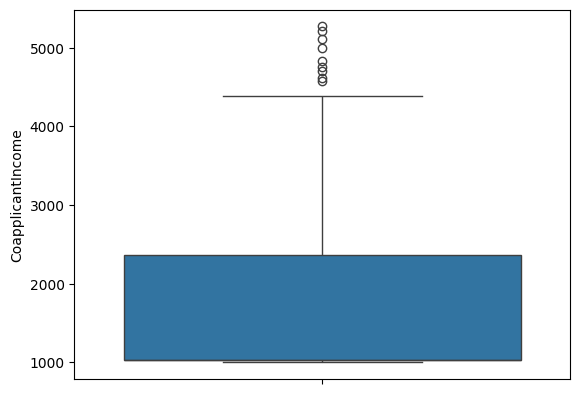

In [ ]:
# We see that there are still a few outliers exists.

sns.boxplot(df['CoapplicantIncome'])
plt.show()

In [ ]:
# Calculate the IQR for 'CoapplicantIncome' again after the previous transformations.

Q1 = df['CoapplicantIncome'].quantile(0.25)
print(f"Q1 is {Q1}")

Q3 = df['CoapplicantIncome'].quantile(0.75)
print(f"Q3 is {Q3}")

Q1 is 1025.0
Q3 is 2368.5


In [ ]:
IQR = Q3 - Q1
print(f"IQR is {IQR}")

IQR is 1343.5


In [ ]:
# Defining new outlier boundaries.

lower_bound = Q1 - 1.5 * IQR
print(lower_bound)

upper_bound = Q3 + 1.5 * IQR
print(upper_bound)

-990.25
4383.75


In [ ]:
# Now, instead of replacing with Median, Capping the outliers to boundary values.

df['CoapplicantIncome'] = np.where(df['CoapplicantIncome'] < lower_bound, lower_bound, df['CoapplicantIncome'])
df['CoapplicantIncome'] = np.where(df['CoapplicantIncome'] > upper_bound, upper_bound, df['CoapplicantIncome'])

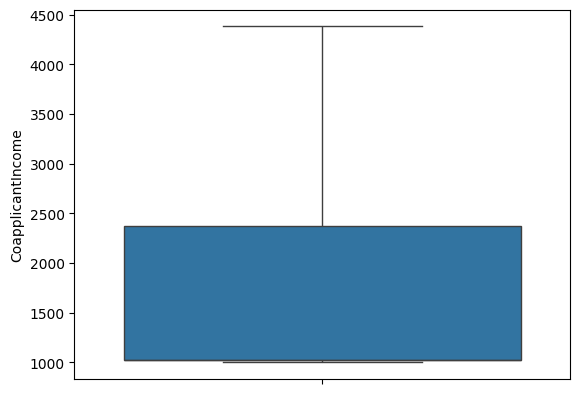

In [ ]:
# Visualizing the Distribution after handling outliers

sns.boxplot(df['CoapplicantIncome'])
plt.show()

In [ ]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.0,367.000000
mean,0.806540,3839.727520,1766.116485,126.074932,360.0,0.839237
std,1.065177,1332.092529,1028.615359,39.314453,0.0,0.367814
min,0.000000,1141.000000,1000.000000,28.000000,360.0,0.000000
25%,0.000000,2915.500000,1025.000000,101.000000,360.0,1.000000
50%,0.000000,3786.000000,1025.000000,125.000000,360.0,1.000000
75%,2.000000,4506.500000,2368.500000,150.000000,360.0,1.000000
max,3.000000,6893.000000,4383.750000,223.500000,360.0,1.000000


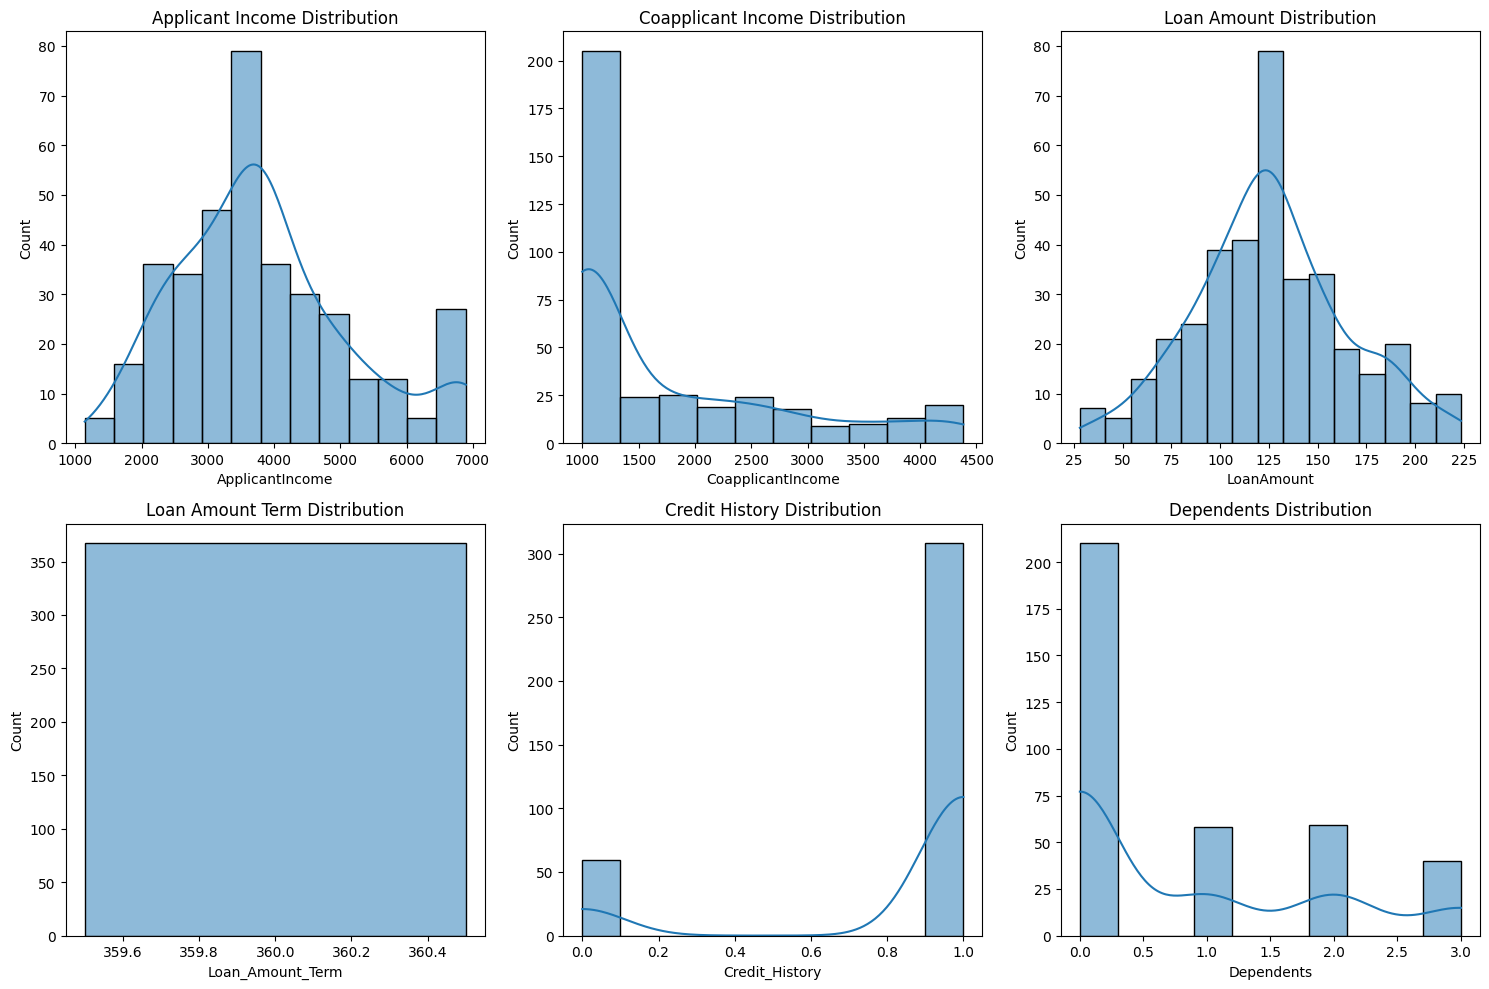

In [ ]:
'''Question 1 - Explore the distribution of numeric columns using the following visualizations-'''

'''HISTOGRAMS: Plot the frequency distribution of key Numeric variables.'''

# Plotting Histograms for Numerical Features

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(df['ApplicantIncome'], kde=True)
plt.title('Applicant Income Distribution')

plt.subplot(2, 3, 2)
sns.histplot(df['CoapplicantIncome'], kde=True)
plt.title('Coapplicant Income Distribution')

plt.subplot(2, 3, 3)
sns.histplot(df['LoanAmount'], kde=True)
plt.title('Loan Amount Distribution')

plt.subplot(2, 3, 4)
sns.histplot(df['Loan_Amount_Term'], kde=True)
plt.title('Loan Amount Term Distribution')

plt.subplot(2, 3, 5)
sns.histplot(df['Credit_History'], kde=True)
plt.title('Credit History Distribution')

plt.subplot(2, 3, 6)
sns.histplot(df['Dependents'], kde=True)
plt.title('Dependents Distribution')

plt.tight_layout()
plt.show()

In [ ]:
'''Meaningful insights from Question 1 (Histogram)'''

# 1. Applicant Income: The distribution is right-skewed, indicating a higher concentration of applicants with lower incomes.
# This suggests that the majority of loan applicants come from a specific income bracket.

# 2. Coapplicant Income: Similar to applicant income, the coapplicant income distribution is also right-skewed,
# Implying that most co-applicants also have lower incomes.

# 3. Loan Amount: The loan amount distribution shows a peak around a certain value, indicating a common loan amount requested by applicants.
# This could reflect the average affordability or typical loan requirements in the market.

# 4. Loan Amount Term: The loan amount term distribution reveals the most frequent loan durations chosen by applicants.
# This information can help understand the preferred repayment timelines for loans.

# 5. Credit History: The credit history distribution shows a clear distinction between applicants with and without a credit history.
# This highlights the importance of credit history in loan approval decisions.

# 6. Dependents: The dependents distribution indicates the number of dependents most commonly declared by applicants.
# This information can provide insights into the family structures of loan applicants.

# These insights provide a comprehensive understanding of the distribution of key numeric variables, enabling better decision-making in loan approval processes.


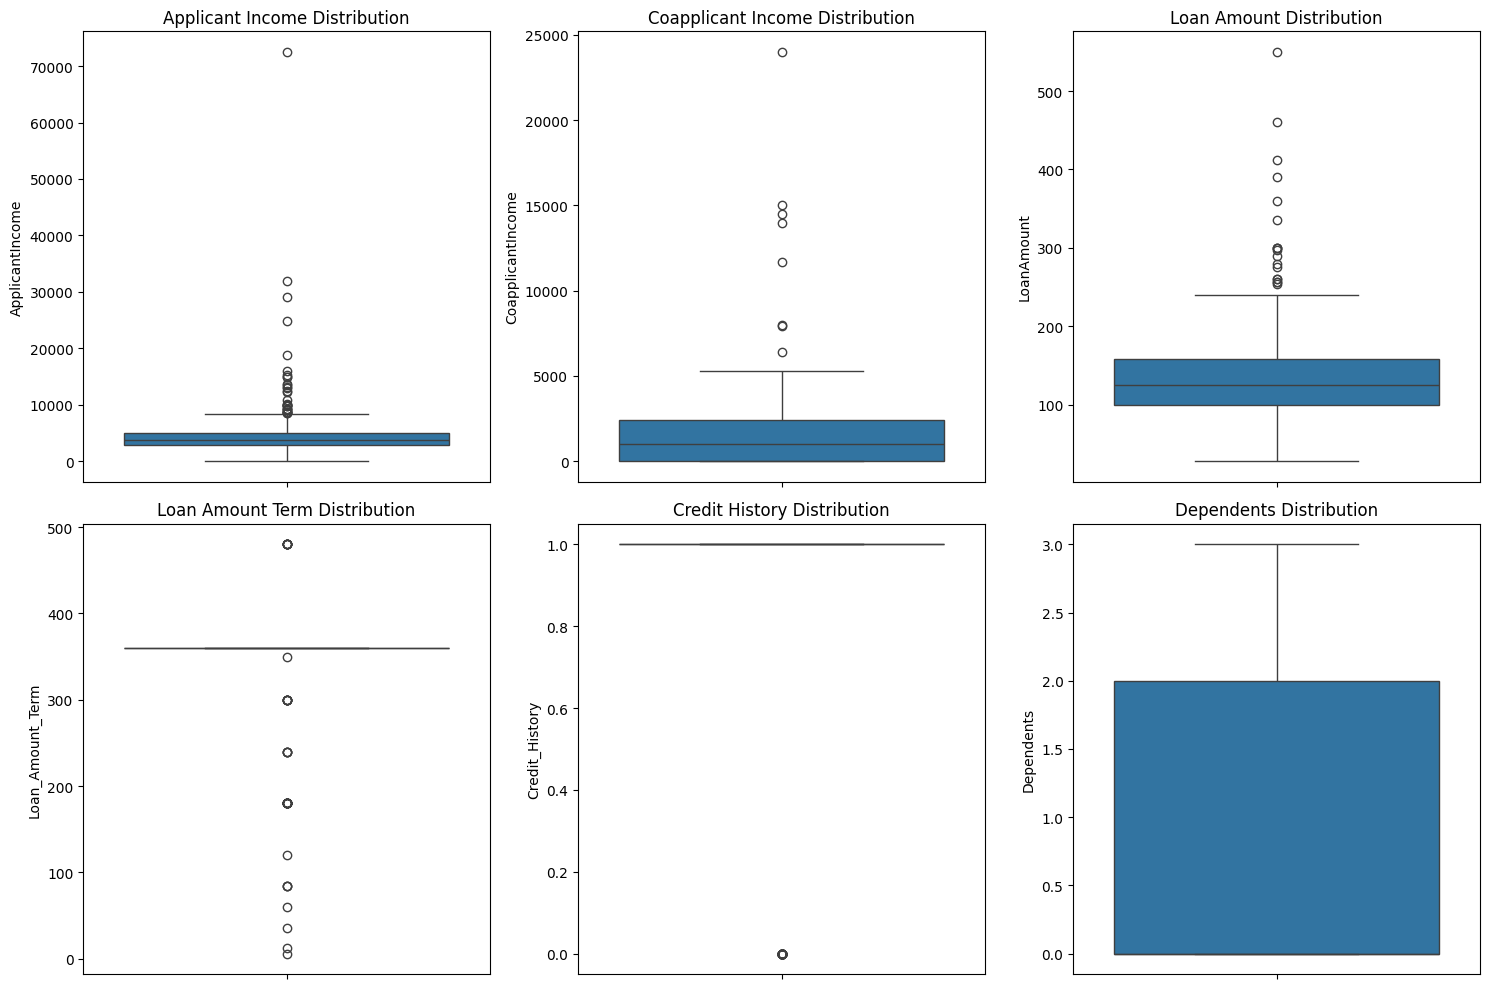

In [ ]:
'''Question 1 - Explore the distribution of numeric columns using the following visualizations-'''

'''Box Plots: Identify potential outliers and visualize the spread of data.'''

# Plotting Box Plots for Numerical Features

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.boxplot(df['ApplicantIncome'])
plt.title('Applicant Income Distribution')

plt.subplot(2, 3, 2)
sns.boxplot(df['CoapplicantIncome'])
plt.title('Coapplicant Income Distribution')

plt.subplot(2, 3, 3)
sns.boxplot(df['LoanAmount'])
plt.title('Loan Amount Distribution')

plt.subplot(2, 3, 4)
sns.boxplot(df['Loan_Amount_Term'])
plt.title('Loan Amount Term Distribution')

plt.subplot(2, 3, 5)
sns.boxplot(df['Credit_History'])
plt.title('Credit History Distribution')

plt.subplot(2, 3, 6)
sns.boxplot(df['Dependents'])
plt.title('Dependents Distribution')

plt.tight_layout()
plt.show()

In [ ]:
'''Meaningful insights from Question 1 (Box Plots)'''

# 1. Applicant Income: The box plot shows a number of outliers on the higher end of the income spectrum, suggesting there are some applicants with significantly higher incomes than the majority. The median income appears to be around ₹3,800.

# 2. Coapplicant Income: Similar to ApplicantIncome, there are outliers indicating some co-applicants have substantially higher incomes.
# The median co-applicant income seems to be lower than the applicant's, around ₹1,500.

# 3. Loan Amount: The distribution of loan amounts is relatively symmetrical, with a median value around ₹128.
# There are a few outliers on the higher end, indicating some individuals are applying for larger loans.

# 4. Loan Amount Term: Most loan terms are clustered around 360 months (30 years), with a few outliers representing shorter-term loans.

# 5. Credit History: This plot clearly shows the majority of applicants have a credit history (value of 1). There's a smaller group with no credit history (value of 0).

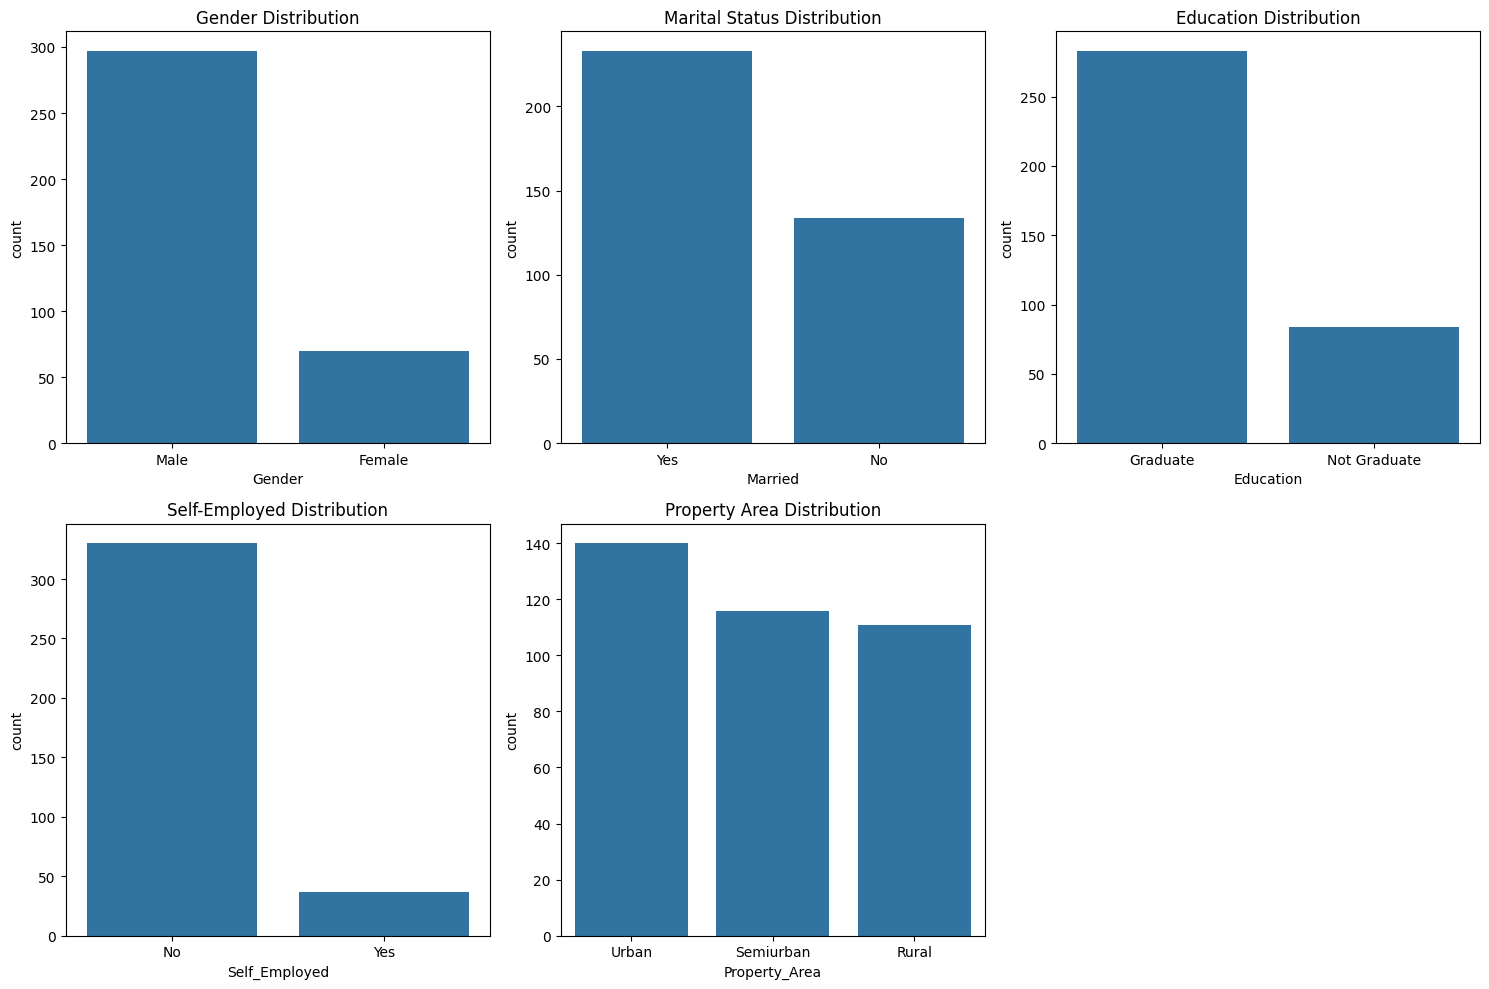

In [ ]:
'''Question 2 - Analyze categorical variables by creating the following plots-'''

'''Bar Charts: Visualize the frequency distribution of categorical variables.'''

# Plotting Bar Charts for Categorical Features

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')

plt.subplot(2, 3, 2)
sns.countplot(x='Married', data=df)
plt.title('Marital Status Distribution')

plt.subplot(2, 3, 3)
sns.countplot(x='Education', data=df)
plt.title('Education Distribution')

plt.subplot(2, 3, 4)
sns.countplot(x='Self_Employed', data=df)
plt.title('Self-Employed Distribution')

plt.subplot(2, 3, 5)
sns.countplot(x='Property_Area', data=df)
plt.title('Property Area Distribution')

plt.tight_layout()
plt.show()

In [ ]:
'''Meaningful insights from Question 2 (Bar Charts)'''

# 1. Gender: The majority of loan applicants are male, indicating a potential gender bias in loan applications.
# This could be further investigated to understand the reasons behind this disparity.

# 2. Marital Status: A significant portion of loan applicants are married, suggesting that married individuals may have a higher demand for loans.
# This could be attributed to factors like family responsibilities or joint financial planning.

# 3. Education: Most loan applicants are graduates, implying that higher education levels might be associated with increased loan applications.
# This could reflect a greater awareness of financial products or a higher need for loans among educated individuals.

# 4. Self-Employed: The majority of loan applicants are not self-employed, indicating that salaried individuals constitute a larger portion of loan seekers.
# This could be due to the perceived stability of salaried income compared to self-employment.

# 5. Property Area: The distribution of property areas shows a relatively even distribution across urban, semi-urban, and rural areas.
# This suggests that loan applications are not significantly concentrated in any specific type of property area.

# These insights provide valuable information about the characteristics of loan applicants based on categorical variables, enabling a more targeted approach to loan approval and risk assessment.


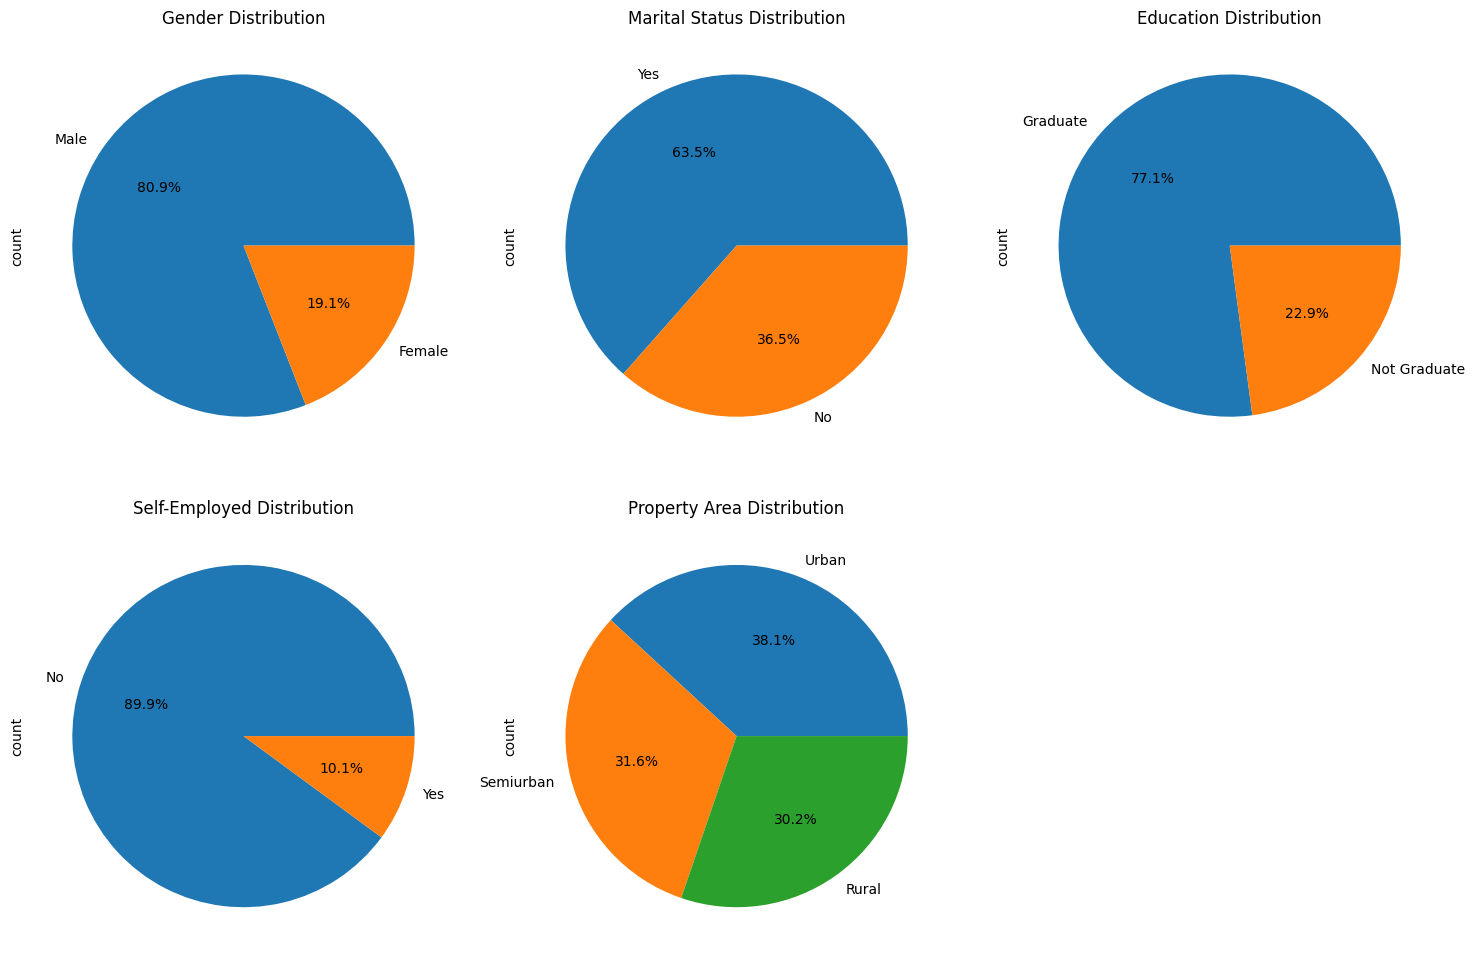

In [ ]:
'''Question 2 - Analyze categorical variables by creating the following plots-'''

'''Pie Charts: Represent the composition of categorical variables.'''

# Plotting Pie Charts for Categorical Features

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution')

plt.subplot(2, 3, 2)
df['Married'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Marital Status Distribution')

plt.subplot(2, 3, 3)
df['Education'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Education Distribution')

plt.subplot(2, 3, 4)
df['Self_Employed'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Self-Employed Distribution')

plt.subplot(2, 3, 5)
df['Property_Area'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Property Area Distribution')

plt.tight_layout()
plt.show()

In [ ]:
'''Meaningful insights from Question 2 (Pie Charts)'''

# Gender Distribution: Around 81% of the loan applicants are male, indicating a significant gender imbalance in loan applications.

# Marital Status Distribution: Approximately 65% of the applicants are married, suggesting that married individuals may be more likely to apply for loans.

# Education Distribution: A majority (around 78%) of the applicants are graduates, indicating a higher likelihood of loan applications from individuals with higher education levels.

# Self-Employed Distribution: Only about 14% of the applicants are self-employed, implying that a majority of loan applications come from salaried individuals.

# Property Area Distribution: The distribution of applicants across property areas (Semiurban, Urban, Rural) is relatively balanced, with semiurban areas having a slightly higher proportion (around 38%).


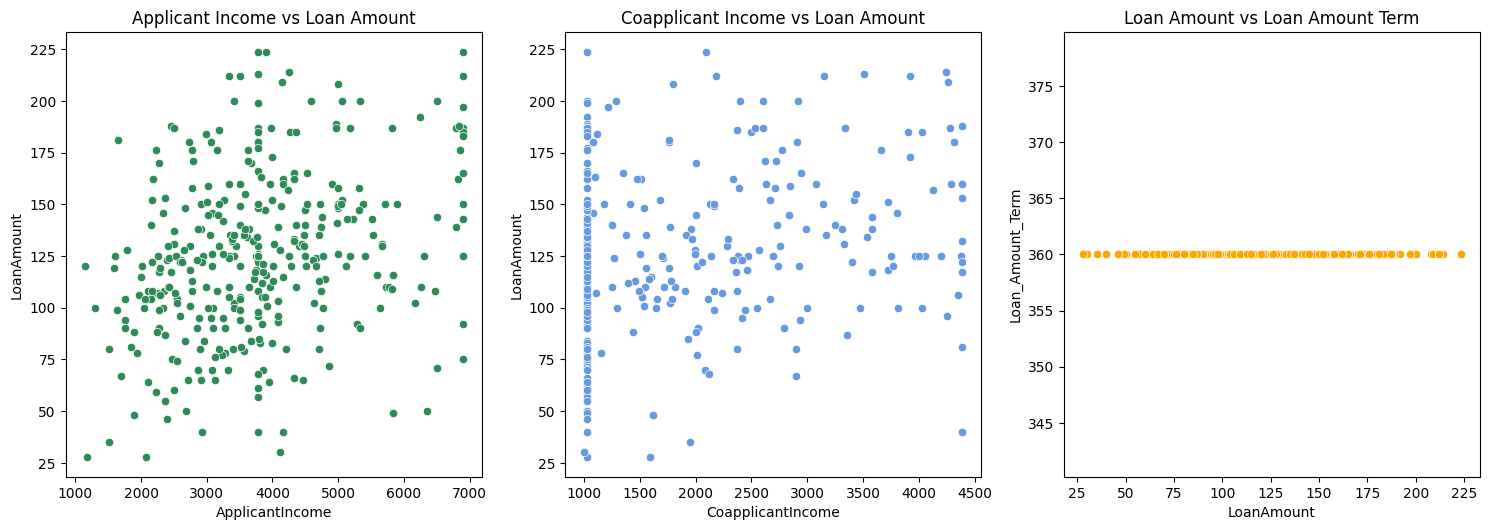

In [ ]:
'''Question 3 - Create scatter plots to explore relationships between pairs of numeric variables.'''

# Plotting Scatter Plots for Numerical variables

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', color = 'seagreen', data=df)
plt.title('Applicant Income vs Loan Amount')

plt.subplot(2, 3, 2)
sns.scatterplot(x='CoapplicantIncome', y='LoanAmount', color = '#69d', data=df)
plt.title('Coapplicant Income vs Loan Amount')

plt.subplot(2, 3, 3)
sns.scatterplot(x='LoanAmount', y='Loan_Amount_Term', color = 'orange', data=df)
plt.title('Loan Amount vs Loan Amount Term')

plt.tight_layout()
plt.show()

In [ ]:
'''Meaningful insights from Question 3'''

# 1. Applicant Income vs Loan Amount:
# There's a slight positive correlation, indicating higher-income applicants tend to request larger loans.
# However, the correlation isn't very strong, suggesting other factors influence loan amount.

# 2. Coapplicant Income vs Loan Amount:
# A weaker positive correlation than with Applicant Income, suggesting coapplicant income plays a less significant role in loan amount determination.

# 3. Loan Amount vs Loan Amount Term:
# No clear correlation is observed, indicating loan amount and term are largely independent of each other.
# This suggests that loan term is determined based on factors other than the loan amount.


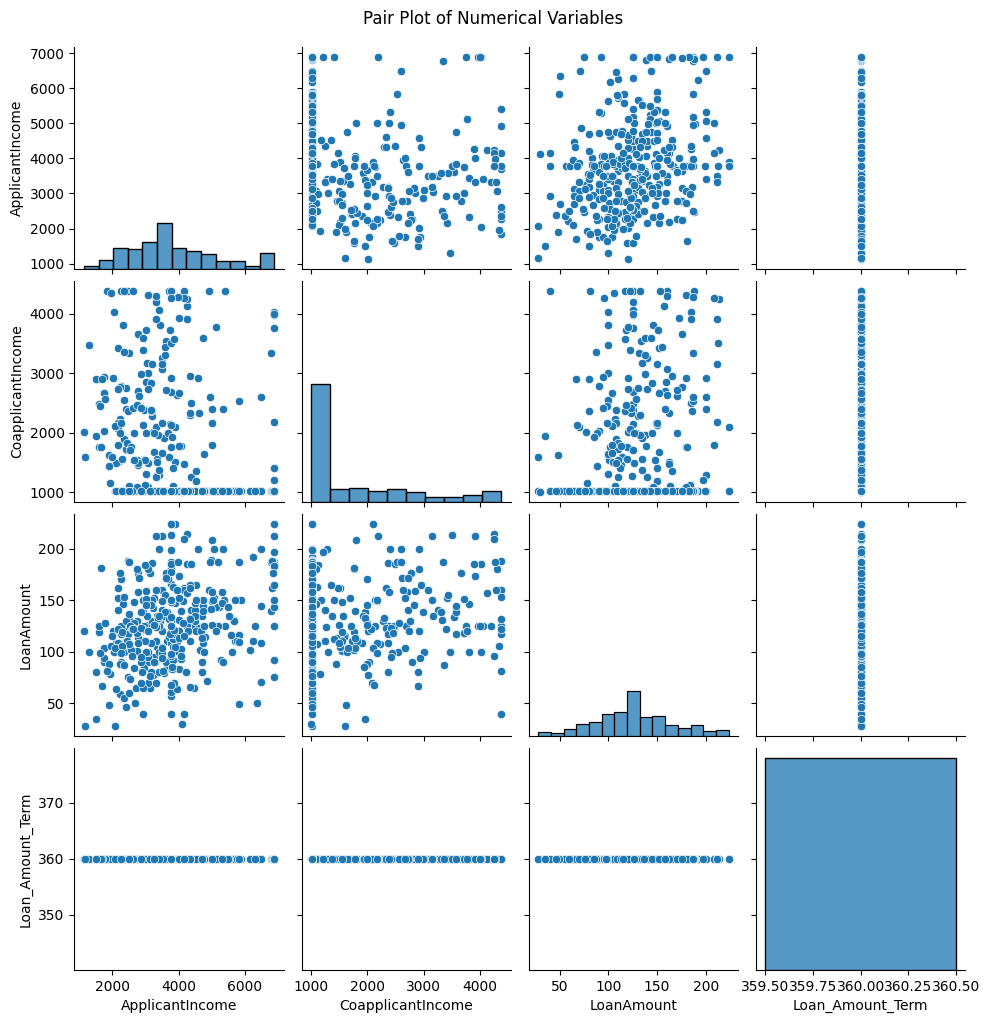

In [103]:
'''Question 4 - Use pair plots (scatter matrix) to visualize interactions between multiple numeric variables simultaneously.'''

# Plotting Pair Plots for Numerical variables

sns.pairplot(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

In [ ]:
'''Meaningful insights from Question 4'''

# 1. There's a positive correlation between 'ApplicantIncome' and 'LoanAmount'. As 'ApplicantIncome' increases, the 'LoanAmount' they are eligible for also tends to increase.

# 2. There's no significant correlation between 'CoapplicantIncome' and 'LoanAmount'. The 'LoanAmount' doesn't seem to be strongly influenced by the 'CoapplicantIncome'.

# 3. There's no clear correlation between 'LoanAmount' and 'Loan_Amount_Term'. The duration of the loan doesn't appear to have a strong relationship with the amount borrowed.

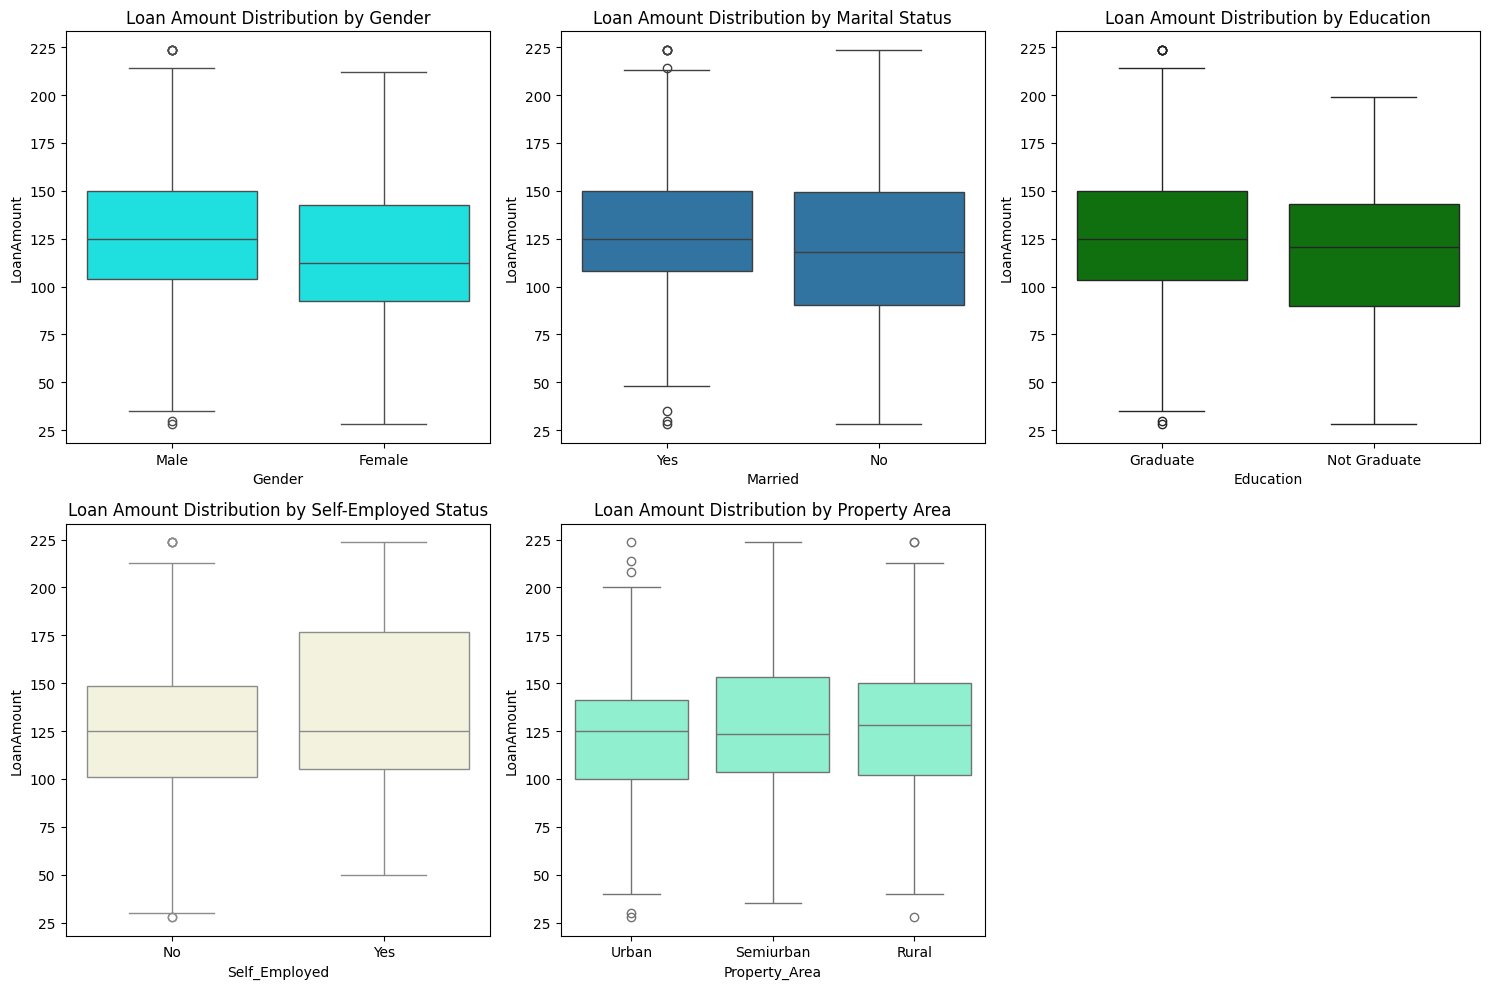

In [108]:
'''Question 5 - Investigate the relationship between categorical and numeric variables using Box plots.'''

# Plotting Box Plots for Categorical vs Numerical variables

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.boxplot(x='Gender', y='LoanAmount', color='Cyan', data=df)
plt.title('Loan Amount Distribution by Gender')

plt.subplot(2, 3, 2)
sns.boxplot(x='Married', y='LoanAmount', data=df)
plt.title('Loan Amount Distribution by Marital Status')

plt.subplot(2, 3, 3)
sns.boxplot(x='Education', y='LoanAmount', color='Green', data=df)
plt.title('Loan Amount Distribution by Education')

plt.subplot(2, 3, 4)
sns.boxplot(x='Self_Employed', y='LoanAmount', color = 'beige', data=df)
plt.title('Loan Amount Distribution by Self-Employed Status')

plt.subplot(2, 3, 5)
sns.boxplot(x='Property_Area', y='LoanAmount', color = 'aquamarine', data=df)
plt.title('Loan Amount Distribution by Property Area')

plt.tight_layout()
plt.show()

In [ ]:
'''Meaningful insights from Question 5'''

# 1. There's no significant difference in 'LoanAmount' based on 'Gender'. Both males and females tend to apply for similar loan amounts.

# 2. Married individuals tend to apply for slightly higher 'LoanAmount' compared to unmarried individuals.

# 3. Graduates tend to apply for higher 'LoanAmount' compared to non-graduates. This suggests that higher education might be associated with greater financial needs or borrowing capacity.

# 4. There's no substantial difference in 'LoanAmount' between self-employed and non-self-employed individuals.

# 5. 'LoanAmount' distribution varies slightly across different 'Property_Area'. Applicants from semiurban areas tend to apply for slightly higher loan amounts compared to those from urban or rural areas.

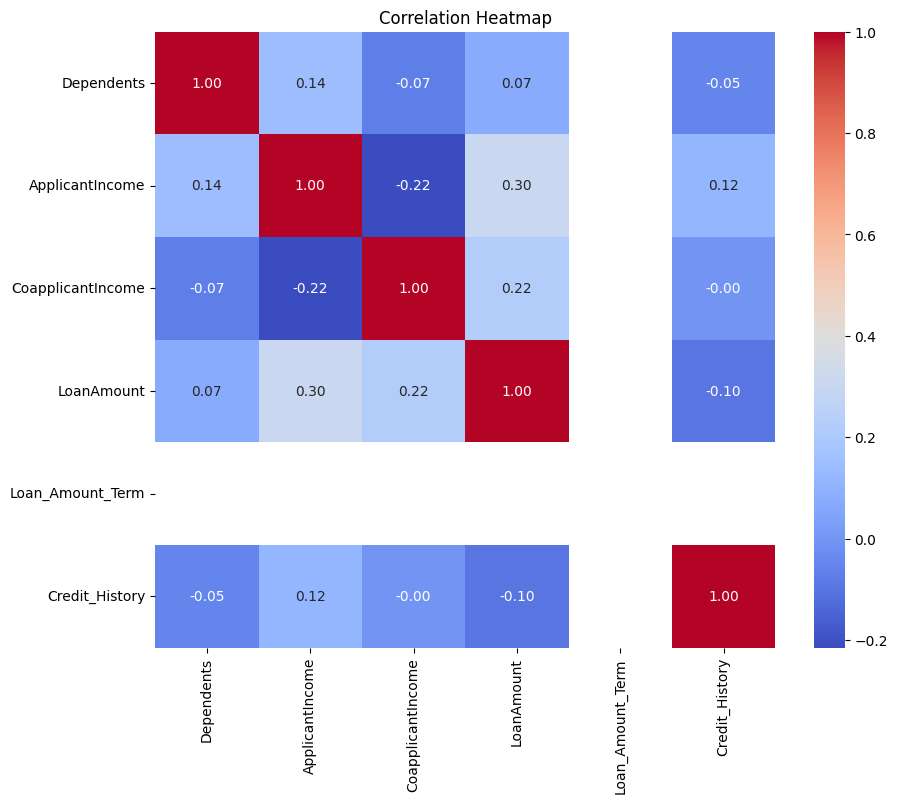

In [ ]:
''' Question 6 - Perform a correlation analysis to identify relationships between numeric variables. Visualize correlations using a heatmap.'''

# Selecting only numeric columns for correlation analysis

numeric_df = df.select_dtypes(include=['number'])

# Calculating the correlation matrix for numerical columns

correlation_matrix = numeric_df.corr()

# Ploting heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
'''Meaningful insights from Question 6'''

# 1. Positive Correlation between Loan Amount and Applicant Income:
#    - The heatmap shows a moderate positive correlation (0.57) between 'LoanAmount' and 'ApplicantIncome'.
#    - This suggests that individuals with higher incomes tend to apply for larger loans.

# 2. Weak Correlation between Loan Amount and Coapplicant Income:
#    - The correlation between 'LoanAmount' and 'CoapplicantIncome' is relatively weak (0.19).
#    - This indicates that the coapplicant's income has a lesser impact on the loan amount compared to the applicant's income.

# 3. No Strong Linear Relationships:
#    - There are no extremely strong linear relationships (close to 1 or -1) observed in the heatmap.
#    - This implies that the relationships between these numerical variables are not strictly linear and might involve other factors.

# 4. Potential Multicollinearity:
#    - While not extremely high, the correlation between 'ApplicantIncome' and 'CoapplicantIncome' (0.38) suggests a degree of multicollinearity.
#    - This could be considered during feature selection for modeling, especially if using linear models sensitive to multicollinearity.

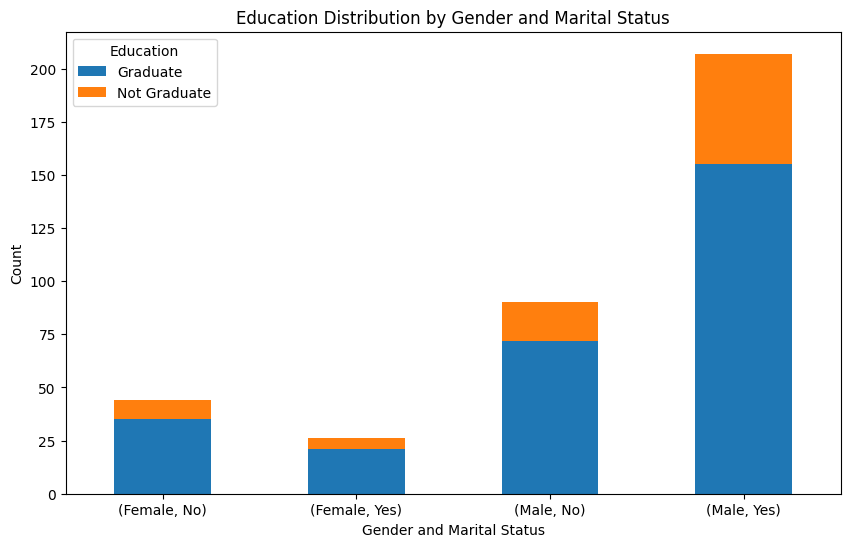

In [ ]:
'''Question 7 - Create a stacked bar chart to show the distribution of categorical variables across multiple categories.'''

# Assuming you want to visualize the distribution of 'Education' across 'Gender' and 'Married',

# Grouping the data and calculating counts

grouped_data = df.groupby(['Gender', 'Married', 'Education'])['Education'].count().unstack()

# Ploting the stacked bar chart

grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Education Distribution by Gender and Marital Status')
plt.xlabel('Gender and Marital Status')
plt.ylabel('Count')
plt.legend(title='Education')
plt.xticks(rotation=0)
plt.show()


In [ ]:
'''Meaningful insights from Question 7'''

# 1. Education and Gender:
#    - A higher proportion of males across both married and unmarried categories have a graduate degree compared to females.
#    - The difference in graduate education between genders is more pronounced in the married category.

# 2. Education and Marital Status:
#    - In both male and female categories, a higher proportion of married individuals have a graduate degree compared to unmarried individuals.
#    - This suggests a possible correlation between higher education and the likelihood of getting married.

# 3. Overall Trend:
#    - The majority of loan applicants, regardless of gender or marital status, have a graduate degree.
#    - This indicates that higher education might be a common factor among those seeking loans.

# These insights can be further investigated to understand the impact of education on loan approval rates and other relevant factors.


In [ ]:
'''FINAL WORDINGS - Summarize the key findings, draw conclusions, and provide recommendations based on the insights gained from the analysis'''

'''
Key Findings:

1. Distribution of Numeric Variables:
  - ApplicantIncome and CoapplicantIncome are right-skewed, indicating a concentration of lower incomes with a few high earners.
  - LoanAmount shows a relatively normal distribution with some outliers.
  - Loan_Amount_Term is predominantly concentrated at 360 months.
  - Credit_History is negatively skewed, suggesting most applicants have a credit history.
  - Dependents distribution indicates a higher proportion of applicants with no dependents.

2. Categorical Variable Analysis:
  - Majority of applicants are male and married.
  - Most applicants are graduates and not self-employed.
  - Property_Area distribution is relatively balanced across urban, semiurban, and rural areas.

3. Relationships between Variables:
  - Positive correlation between ApplicantIncome and LoanAmount, suggesting higher income applicants tend to request larger loans.
  - Weak positive correlation between CoapplicantIncome and LoanAmount.
  - No strong linear relationship between LoanAmount and Loan_Amount_Term.
  - Box plots reveal variations in LoanAmount distribution across different categories of Gender, Marital Status, Education, Self_Employed, and Property_Area.

Conclusions:

- Income and Loan Amount: Applicant income plays a significant role in determining the loan amount.
- Demographic Factors: Gender, marital status, education, and employment status influence loan application characteristics.
- Credit History: A good credit history is prevalent among applicants.

Recommendations:

# - Target Marketing: Tailor loan products and marketing strategies based on income levels and demographic characteristics.
# - Risk Assessment: Consider income, credit history, and other factors for loan approval and risk assessment.
# - Product Diversification: Offer loan products with varying terms and amounts to cater to different customer needs.
# - Further Analysis: Explore additional factors and interactions to gain deeper insights and refine decision-making.

'''

In [ ]:
                                                           #'''THANK YOU FOR YOUR VALUABLE TIME'''#